# Exercise 9

Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?

In [8]:
import h5py
import numpy as np

f = h5py.File("data.h5", "r")
X_train = np.array(f["X_train"])
y_train = np.array(f["y_train"])

X_val = np.array(f["X_val"])
y_val = np.array(f["y_val"])

X_test = np.array(f["X_test"])
y_test = np.array(f["y_test"])

f.close()

In [9]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 784) (50000,)
(10000, 784) (10000,)
(10000, 784) (10000,)


In [10]:
from sklearn import pipeline
from sklearn import preprocessing
from sklearn import svm

classifier = svm.SVC()

model = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("classifier", classifier)
])

In [11]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])

In [12]:
from sklearn import metrics

y_pred = model.predict(X_val)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       960
           1       0.98      0.98      0.98      1122
           2       0.95      0.96      0.96      1020
           3       0.97      0.95      0.96      1055
           4       0.96      0.97      0.97       961
           5       0.97      0.94      0.95       906
           6       0.97      0.97      0.97       973
           7       0.93      0.97      0.95      1117
           8       0.96      0.96      0.96       938
           9       0.96      0.95      0.96       948

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

[[ 939    0    2    0    1    4    7    3    4    0]
 [   1 1102    5    0    2    0    2    5    1    4]
 [   2    3  984    5    3    0    4   13    6    0]
 [   0    3   15 1003    1    8    0   15   10    0]
 [   0    1    4    0  929   

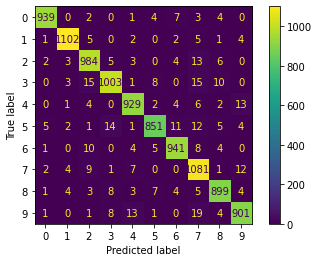

In [14]:
import matplotlib.pyplot as plt

print(metrics.classification_report(y_val, y_pred))
confusion = metrics.confusion_matrix(y_val, y_pred)

disp = metrics.ConfusionMatrixDisplay(confusion)
disp.plot()
plt.show()